In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CL_Nagar_NE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLMLNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'
CLNE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'
CL_Gupta_NE_path = '/Users/noravivancogonzalez/code/wcEcoli/out/pdr_CLClim3aNE_protease_assignment/kb_plot_out/protein_half_lives.tsv'

In [3]:
CL_Nagar_NE_half_lives = pd.read_csv(CL_Nagar_NE_path,sep='\t')
CLNE_half_lives = pd.read_csv(CLNE_path,sep='\t')
CL_Gupta_NE_half_lives = pd.read_csv(CL_Gupta_NE_path,sep='\t')

In [4]:
CL_Gupta_NE_half_lives['Parca'] = 'CL_Gupta_NE'
CL_Nagar_NE_half_lives['Parca'] = 'CL_Nagar_NE'
CLNE_half_lives['Parca'] = 'CLNE'
master_comp_pd = pd.concat([CL_Gupta_NE_half_lives, CL_Nagar_NE_half_lives, CLNE_half_lives])

In [36]:
master_comp_pd.head(5)

,monomer_id,degradation_rate(1/s),half_life_(min),degradation_rate_source,Parca
0,1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER,0.000023,501.707893,Gupta_et_al_MS_2024,CL_Gupta_NE
1,1-PFK-MONOMER,0.000015,766.256894,Gupta_et_al_MS_2024,CL_Gupta_NE
2,2-DEHYDROPANTOATE-REDUCT-MONOMER,0.000019,600.000000,N_end_rule,CL_Gupta_NE
3,2-ISOPROPYLMALATESYN-MONOMER,0.000042,276.924332,Gupta_et_al_MS_2024,CL_Gupta_NE
4,2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER,0.000023,493.397050,Gupta_et_al_MS_2024,CL_Gupta_NE


In [39]:
master_comp_pd[(master_comp_pd['Parca'] == 'CLNE') & (master_comp_pd['degradation_rate_source'] == 'N_end_rule')].groupby('half_life_(min)').count()

,monomer_id,degradation_rate(1/s),degradation_rate_source,Parca
half_life_(min),,,,
2.0,7,7,7,7
600.0,4295,4295,4295,4295
6000.0,1,1,1,1


In [23]:
# Define the desired order of the legend and their new names
label_mapping = {
    'Gupta_et_al_MS_2024': 'Gupta et al. Mass Spec',
    'Nagar_et_al_ML_2021': 'Nagar et al. Mass Spec',
    'N_end_rule': 'N-end rule',
    'CL_measured_deg_rates_2020': 'Covert lab experimental values'
}

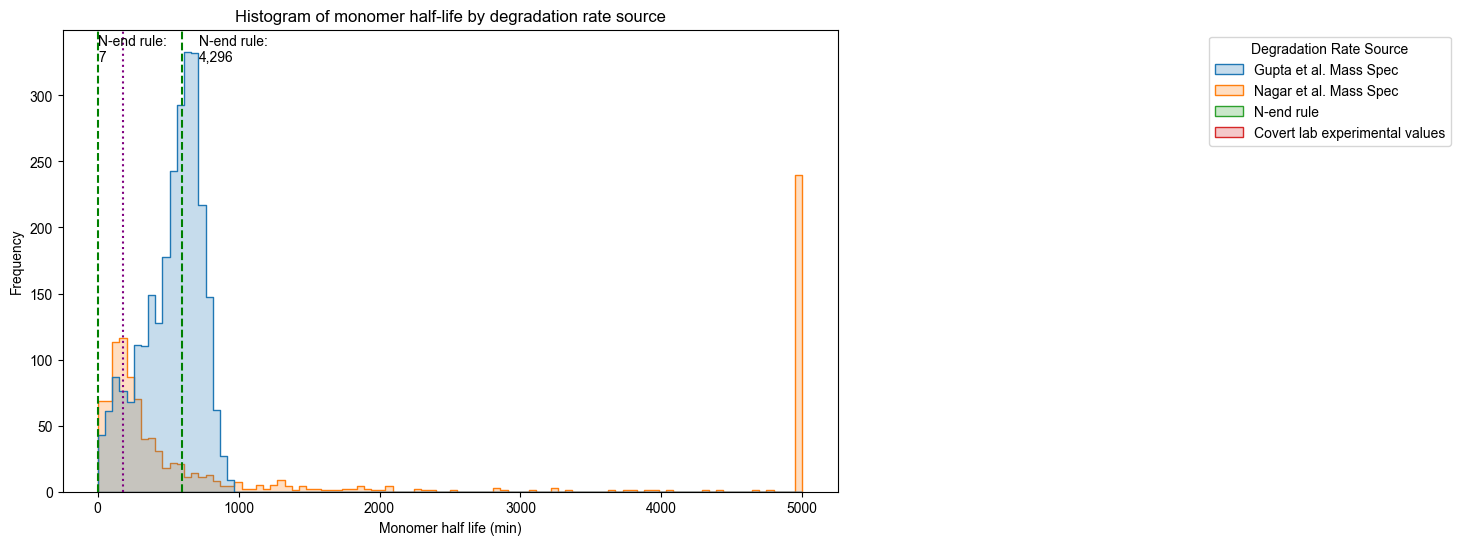

In [62]:
plt.figure(figsize=(10, 6)) 
g=sns.histplot(data = master_comp_pd[
               (master_comp_pd['Parca'] != 'CLNE') 
               & (master_comp_pd['degradation_rate_source'] != 'N_end_rule')
               & (master_comp_pd['degradation_rate_source'] != 'CL_measured_deg_rates_2020')
               & (master_comp_pd['half_life_(min)'] <=6000)
               ], 
               x = 'half_life_(min)',
               hue = 'degradation_rate_source', 
               element = 'step',
               hue_order=hue_order_list)

# Add the vertical lines
plt.axvline(x=2, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=600, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=180, color='purple', linestyle=':', linewidth=1.5)


# Add the label at the top of the line
plt.text(2*1.2, plt.ylim()[1]*.99, 'N-end rule:\n7',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(600*1.2, plt.ylim()[1]*.99, 'N-end rule:\n4,296',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)

plt.xlabel('Monomer half life (min)')
plt.ylabel('Frequency')
plt.title('Histogram of monomer half-life by degradation rate source')

# Get the legend object
legend = g.get_legend()
legend_labels = legend.get_texts()

    # Update the text labels with the new names
for text in legend_labels:
    old_label = text.get_text()
    text.set_text(label_mapping.get(old_label, old_label))


legend.set(bbox_to_anchor=(1.8, 1), title = 'Degradation Rate Source')

plt.show()


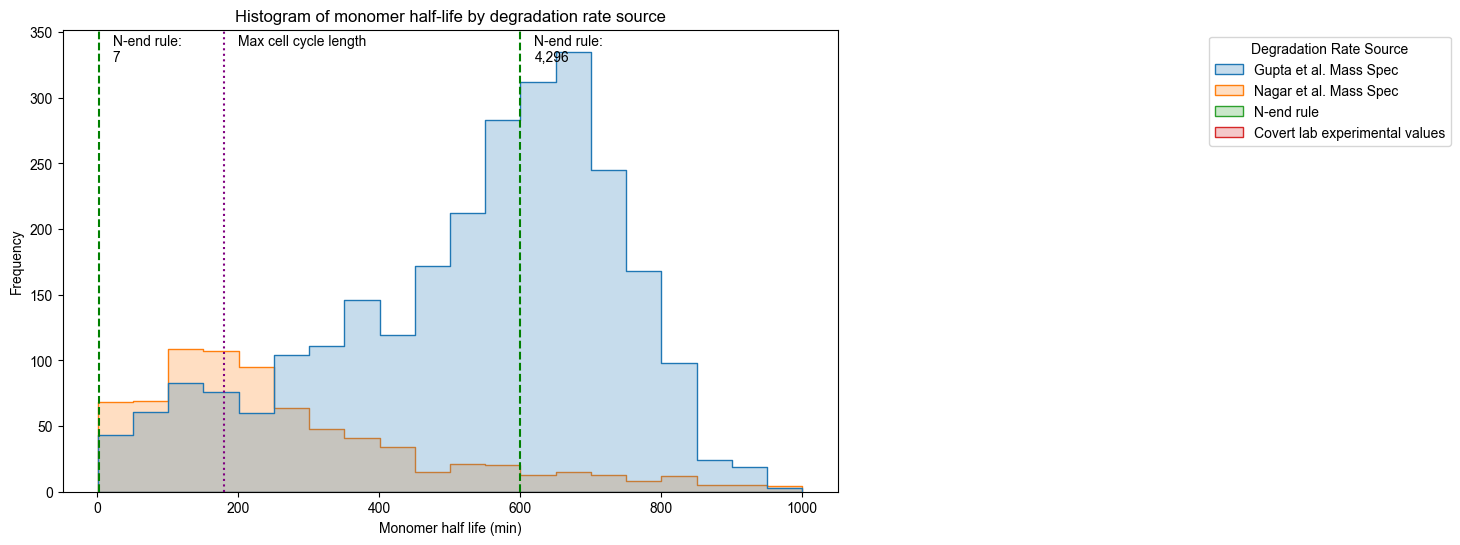

In [66]:
plt.figure(figsize=(10, 6)) 
g=sns.histplot(data = master_comp_pd[
               (master_comp_pd['Parca'] != 'CLNE') 
               & (master_comp_pd['degradation_rate_source'] != 'N_end_rule')
               & (master_comp_pd['degradation_rate_source'] != 'CL_measured_deg_rates_2020')
               & (master_comp_pd['half_life_(min)'] <=1000)
               ], 
               x = 'half_life_(min)',
               hue = 'degradation_rate_source', 
               element = 'step',
               hue_order=hue_order_list)

# Add the vertical lines
plt.axvline(x=2, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=600, color='green', linestyle='--', linewidth=1.5)
plt.axvline(x=180, color='purple', linestyle=':', linewidth=1.5)


# Add the label at the top of the line
plt.text(2+20, plt.ylim()[1]*.99, 'N-end rule:\n7',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(180+20, plt.ylim()[1]*.99, 'Max cell cycle length',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)
plt.text(600+20, plt.ylim()[1]*.99, 'N-end rule:\n4,296',
         horizontalalignment='left', verticalalignment='top',
         color='k', fontsize=10)

plt.xlabel('Monomer half life (min)')
plt.ylabel('Frequency')
plt.title('Histogram of monomer half-life by degradation rate source')

# Get the legend object
legend = g.get_legend()
legend_labels = legend.get_texts()

    # Update the text labels with the new names
for text in legend_labels:
    old_label = text.get_text()
    text.set_text(label_mapping.get(old_label, old_label))


legend.set(bbox_to_anchor=(1.8, 1), title = 'Degradation Rate Source')

plt.show()
